In [1]:
import pandas as pd
import matplotlib as mat
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import os, sys
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC
import joblib
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))


In [16]:
from load_data import load_data

data = load_data('../data/archive.zip', filename='Summary of Weather.csv')
data = pd.read_csv('../data/Summary of Weather.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_23660\2765289851.py:4: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/Summary of Weather.csv')


In [17]:
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.shape

(119040, 31)

In [19]:
data_types = data.dtypes

data_types

STA              int64
Date            object
Precip          object
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
YR               int64
MO               int64
DA               int64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF             object
SND            float64
FT             float64
FB             float64
FTI            float64
ITH            float64
PGT            float64
TSHDSBRSGF      object
SD3            float64
RHX            float64
RHN            float64
RVG            float64
WTE            float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [20]:
missing_values = data.isnull().sum()
missing_values

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [11]:
data.duplicated().sum()

np.int64(0)

In [32]:
data.dropna(inplace=True)


In [22]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(data)  # 50% threshold
data = data.drop(columns=[col for col in data.columns if data[col].isnull().sum() > threshold])


In [33]:
summary_statistics = data.describe()
summary_statistics

,STA,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,MAX,MIN,MEA
count,115697.000000,115697.000000,115697.000000,115697.000000,115697.000000,115697.000000,115697.000000,115697.000000,115697.000000,115697.000000,115697.000000
mean,29806.531794,27.488651,18.140243,22.817575,0.248804,43.820721,6.734954,15.791326,81.479572,64.652437,73.071635
std,20964.039984,7.956779,7.827687,7.623937,2.646367,1.125206,3.416231,8.796438,14.322203,14.089836,13.723087
min,10001.000000,-33.333333,-38.333333,-35.555556,0.000000,40.000000,1.000000,1.000000,-28.000000,-37.000000,-32.000000
25%,11801.000000,25.555556,15.555556,21.111111,0.000000,43.000000,4.000000,8.000000,78.000000,60.000000,70.000000
50%,22509.000000,29.444444,21.111111,25.555556,0.000000,44.000000,7.000000,16.000000,85.000000,70.000000,78.000000
75%,33501.000000,31.666667,23.333333,27.222222,0.000000,45.000000,10.000000,23.000000,89.000000,74.000000,81.000000
max,82506.000000,50.000000,34.444444,40.000000,86.360000,45.000000,12.000000,31.000000,122.000000,94.000000,104.000000


<Axes: xlabel='MinTemp'>

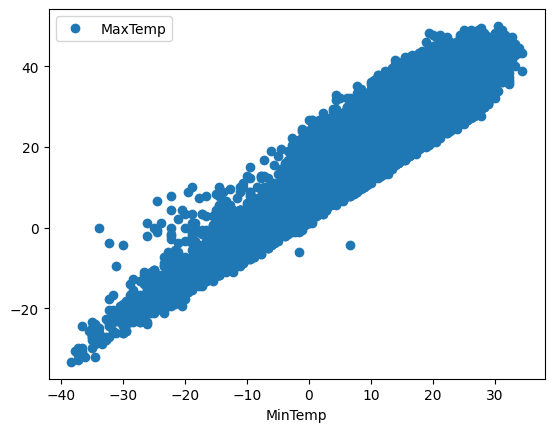

In [37]:
import plotly.express as px
data.plot(x='MinTemp',y='MaxTemp',style='o')

In [38]:
x = data['MinTemp'].values.reshape(-1,1)
y = data['MaxTemp'].values.reshape(-1,1)

In [39]:
x

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [40]:
y

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

In [42]:
from sklearn.model_selection import train_test_split


X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

In [44]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [45]:
model.coef_

array([[0.87947145]])

In [46]:
model.intercept_

array([11.53361372])

In [47]:
y_pre = model.predict(X_test)
y_pre

array([[24.72568553],
       [31.07742381],
       [21.30551877],
       ...,
       [28.1458523 ],
       [19.83973301],
       [27.65725704]])

In [49]:
df2 = pd.DataFrame({'Actuall':y_test.flatten() , 'predicted' : y_pre.flatten()})
df2

,Actuall,predicted
0,31.666667,24.725686
1,32.222222,31.077424
2,27.777778,21.305519
3,29.444444,32.054614
4,32.222222,31.566019
...,...,...
23135,31.666667,33.520400
23136,30.000000,31.566019
23137,27.222222,28.145852
23138,23.888889,19.839733


<Axes: >

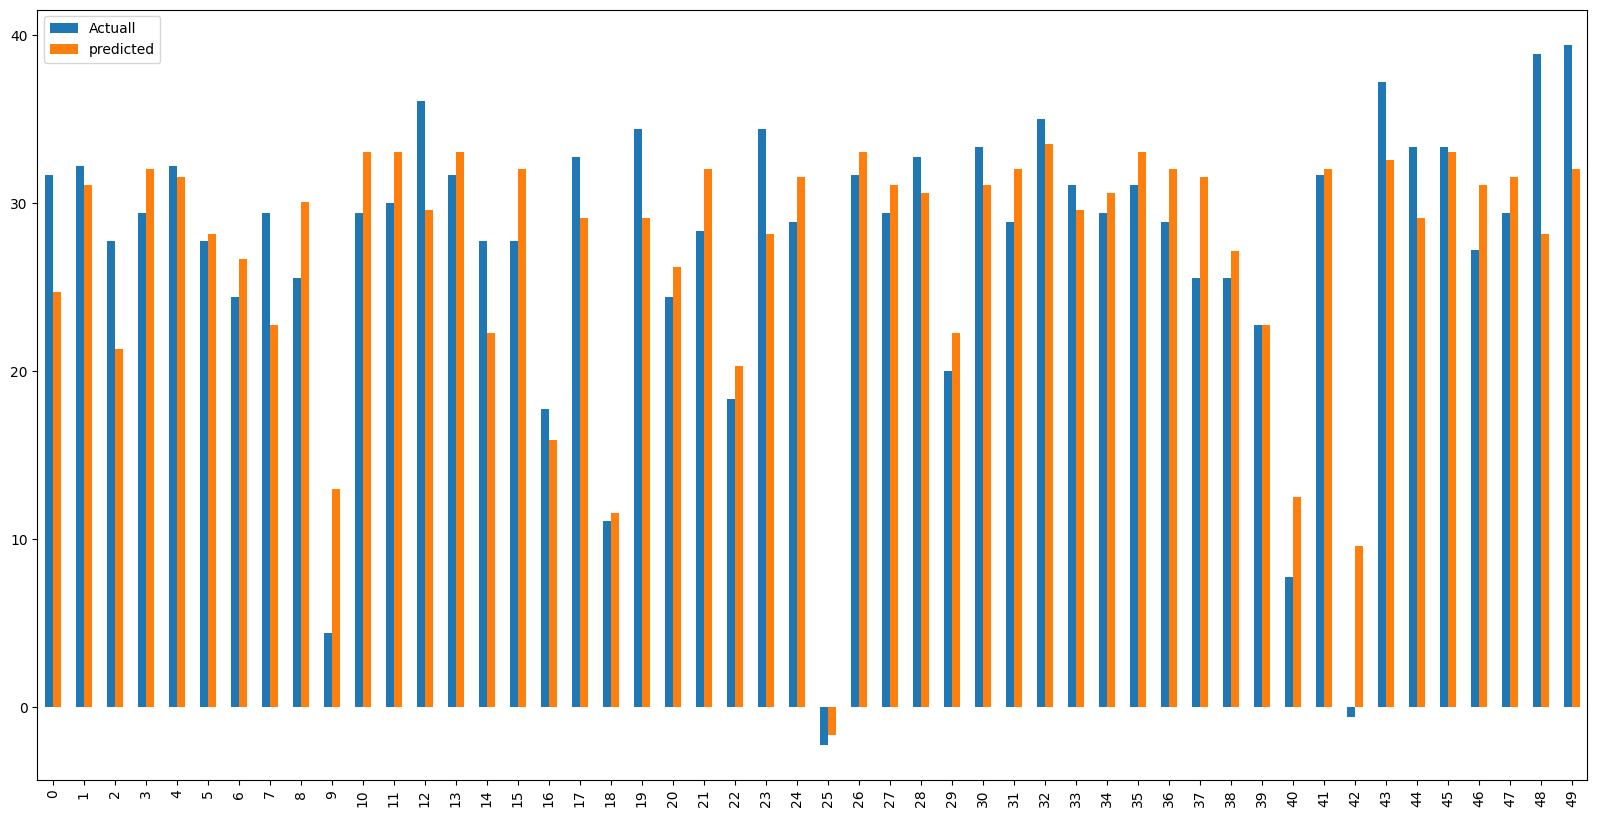

In [50]:
df2.head(50).plot(kind='bar',figsize=(20,10))

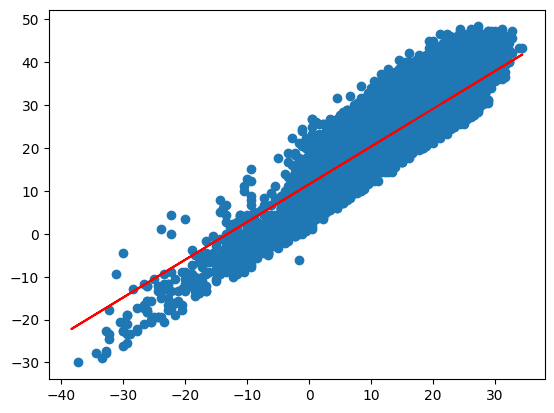

In [51]:
plt.scatter(X_test , y_test)
plt.plot(X_train , model.predict(X_train) , color='red')

In [53]:

joblib.dump(model.fit, 'model.pkl')

['model.pkl']